In [21]:
import scipy as sp
data = sp.genfromtxt("data/web_traffic.tsv", delimiter="\t")

In [22]:
x = data[:,0]
y = data[:,1]

x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]


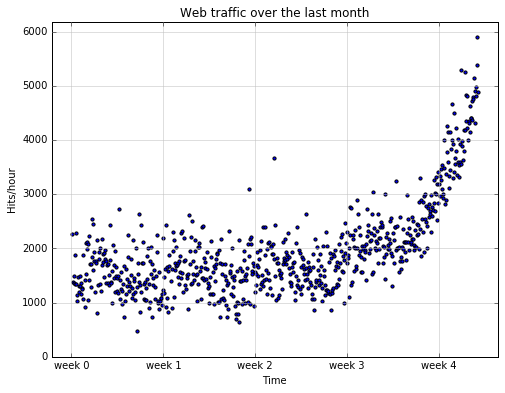

In [44]:
import matplotlib.pyplot as plt
import os

%matplotlib inline



def plot_models(x, y, models, mx=None, ymax=None, xmin=None):
    ''' plot input data '''
    colors = ['g', 'k', 'b', 'm', 'r']
    linestyles = ['-', '-.', '--', ':', '-']

    plt.figure(num=None, figsize=(8, 6))
    plt.clf()
    plt.scatter(x, y, s=10)
    plt.title("Web traffic over the last month")
    plt.xlabel("Time")
    plt.ylabel("Hits/hour")
    plt.xticks(
        [w * 7 * 24 for w in range(10)], ['week %i' % w for w in range(10)])

    if models:
        if mx is None:
            mx = sp.linspace(0, x[-1], 1000)
        for model, style, color in zip(models, linestyles, colors):
            # print "Model:",model
            # print "Coeffs:",model.coeffs
            plt.plot(mx, model(mx), linestyle=style, linewidth=2, c=color)

        plt.legend(["d=%i" % m.order for m in models], loc="upper left")

    plt.autoscale(tight=True)
    plt.ylim(ymin=0)
    if ymax:
        plt.ylim(ymax=ymax)
    if xmin:
        plt.xlim(xmin=xmin)
    plt.grid(True, linestyle='-', color='0.75')
    plt.show()

plot_models(x, y, None)

In [29]:
def error(f, x, y):
    return sp.sum((f(x)-y)**2)

In [36]:
fp1, res1, rank1, sv1, rcond1 = sp.polyfit(x, y, 1, full=True)
print("Model parameters of fp1: %s" % fp1)
print("Error of the model of fp1:", res1)
f1 = sp.poly1d(fp1)
print(f1)

print(error(f1,x,y))

Model parameters of fp1: [   2.59619213  989.02487106]
Error of the model of fp1: [  3.17389767e+08]
 
2.596 x + 989
317389767.34


In [38]:
fp2, res2, rank2, sv2, rcond2 = sp.polyfit(x, y, 2, full=True)
print("Model parameters of fp2: %s" % fp2)
print("Error of the model of fp2:", res2)
f2 = sp.poly1d(fp2)
print(f2)
print(error(f2,x,y))


f3 = sp.poly1d(sp.polyfit(x, y, 3))
print(f3)
print(error(f3,x,y))

f10 = sp.poly1d(sp.polyfit(x, y, 10))
print(f10)
print(error(f10,x,y))

f100 = sp.poly1d(sp.polyfit(x, y, 100))
print(f100)
print(error(f100,x,y))

Model parameters of fp2: [  1.05322215e-02  -5.26545650e+00   1.97476082e+03]
Error of the model of fp2: [  1.79983508e+08]
         2
0.01053 x - 5.265 x + 1975
179983507.878
          3           2
3.05e-05 x - 0.02359 x + 4.942 x + 1333
139350144.032
           10             9             8             7             6
-3.74e-22 x  + 1.365e-18 x - 2.143e-15 x + 1.899e-12 x - 1.046e-09 x
              5             4           3          2
 + 3.709e-07 x - 8.456e-05 x + 0.01192 x - 0.9416 x + 33.37 x + 1264
121942326.364
             53              52              51              50
-6.728e-140 x  + 1.197e-136 x  - 4.658e-135 x  - 4.665e-131 x 
               49              48             47              46
 - 2.543e-128 x  + 2.259e-126 x  + 1.39e-122 x  + 1.161e-119 x 
               45              44              43              42
 + 4.323e-117 x  - 1.508e-114 x  - 3.767e-111 x  - 3.206e-108 x 
               41              40              39             38
 - 1.486e-105 x  + 

/opt/conda/lib/python3.5/site-packages/numpy/lib/polynomial.py:586: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/opt/conda/lib/python3.5/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


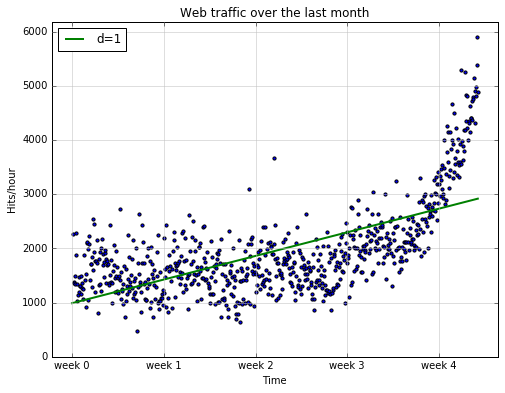

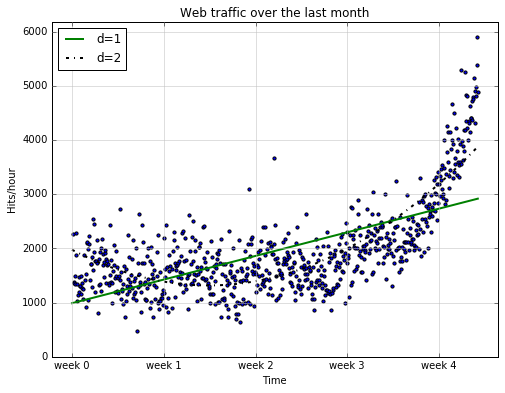

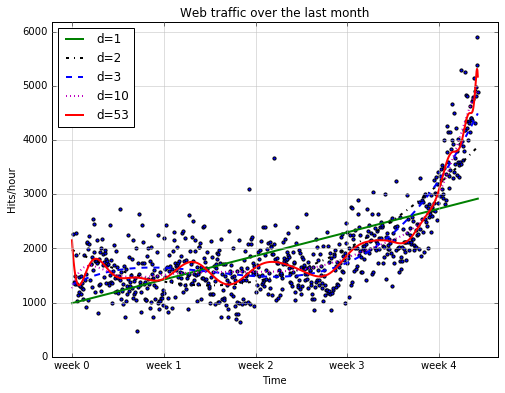

In [46]:
plot_models(x, y, [f1])
plot_models(x, y, [f1, f2])
plot_models(x, y, [f1, f2, f3, f10, f100])

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


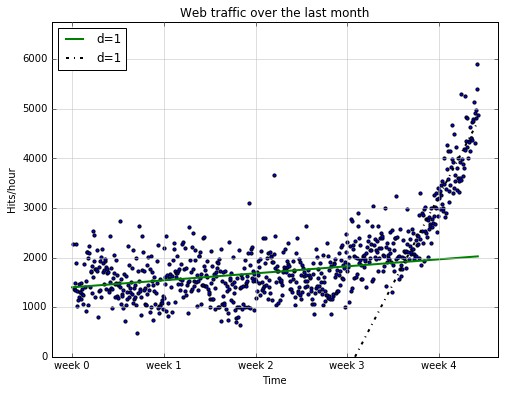

In [49]:
inflection = 3.5 * 7 * 24

xa = x[:inflection]
ya = y[:inflection]
xb = x[inflection:]
yb = y[inflection:]

fa = sp.poly1d(sp.polyfit(xa, ya, 1))
fb = sp.poly1d(sp.polyfit(xb, yb, 1))

plot_models(x, y, [fa, fb])

In [51]:
print("Errors for the complete data set:")
for f in [f1, f2, f3, f10, f100]:
    print("Error d=%i: %f" % (f.order, error(f, x, y)))

print("Errors for only the time after inflection point")
for f in [f1, f2, f3, f10, f100]:
    print("Error d=%i: %f" % (f.order, error(f, xb, yb)))

print("Error inflection=%f" % (error(fa, xa, ya) + error(fb, xb, yb)))


Errors for the complete data set:
Error d=1: 317389767.339778
Error d=2: 179983507.878179
Error d=3: 139350144.031725
Error d=10: 121942326.363588
Error d=53: 109452408.346556
Errors for only the time after inflection point
Error d=1: 145045835.134473
Error d=2: 61116348.809620
Error d=3: 33214248.905597
Error d=10: 21611594.264590
Error d=53: 18656111.682313
Error inflection=132950348.197616


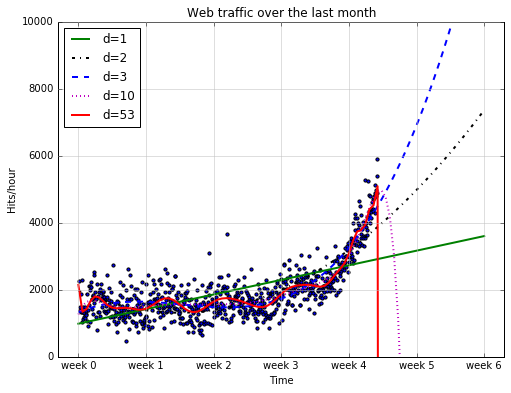

In [52]:

plot_models(
    x, y, [f1, f2, f3, f10, f100],
    mx=sp.linspace(0 * 7 * 24, 6 * 7 * 24, 100),
    ymax=10000, xmin=0 * 7 * 24)

Trained only on data after inflection point
Errors for only the time after inflection point
Error d=1: 22143941.107618
Error d=2: 19768846.989176
Error d=3: 19766452.361027
Error d=10: 18949296.670164
Error d=53: 18300809.914443


/opt/conda/lib/python3.5/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/opt/conda/lib/python3.5/site-packages/numpy/lib/polynomial.py:586: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/opt/conda/lib/python3.5/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


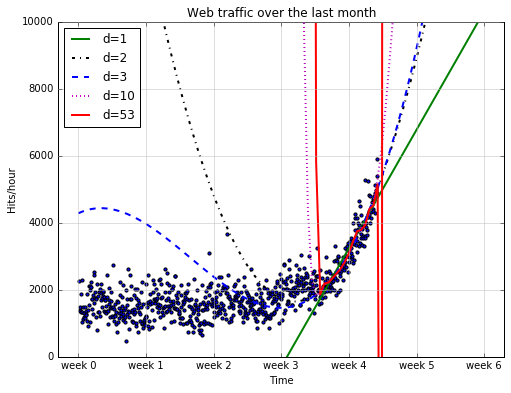

In [54]:
print("Trained only on data after inflection point")
fb1 = fb
fb2 = sp.poly1d(sp.polyfit(xb, yb, 2))
fb3 = sp.poly1d(sp.polyfit(xb, yb, 3))
fb10 = sp.poly1d(sp.polyfit(xb, yb, 10))
fb100 = sp.poly1d(sp.polyfit(xb, yb, 100))

print("Errors for only the time after inflection point")
for f in [fb1, fb2, fb3, fb10, fb100]:
    print("Error d=%i: %f" % (f.order, error(f, xb, yb)))

plot_models(
    x, y, [fb1, fb2, fb3, fb10, fb100],
    mx=sp.linspace(0 * 7 * 24, 6 * 7 * 24, 100),
    ymax=10000, xmin=0 * 7 * 24)

[2, 3, 4, 7, 12, 22, 27, 31, 33, 37, 42, 46, 50, 51, 52, 54, 58, 59, 62, 70, 76, 77, 80, 82, 86, 88, 91, 93, 96, 97, 104, 106, 108, 109, 115, 119, 126, 131, 132, 133, 137, 141, 143, 144]
fbt2(x)= 
         2
0.07587 x - 80.51 x + 2.296e+04
fbt2(x)-100,000= 
         2
0.07587 x - 80.51 x - 7.704e+04
Test errors for only the time after inflection point
Error d=1: 7531319.214648
Error d=2: 6606625.817102
Error d=3: 6882115.616046
Error d=10: 6943329.548485
Error d=53: 9053505.425320


/opt/conda/lib/python3.5/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/opt/conda/lib/python3.5/site-packages/numpy/lib/polynomial.py:586: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/opt/conda/lib/python3.5/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


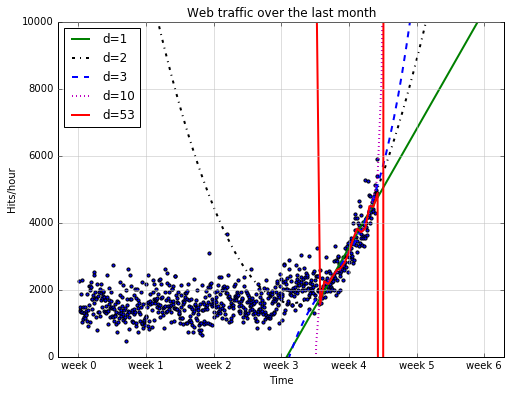

In [59]:
# separating training from testing data
frac = 0.3
split_idx = int(frac * len(xb))
shuffled = sp.random.permutation(list(range(len(xb))))
test = sorted(shuffled[:split_idx])
train = sorted(shuffled[split_idx:])

fbt1 = sp.poly1d(sp.polyfit(xb[train], yb[train], 1))
fbt2 = sp.poly1d(sp.polyfit(xb[train], yb[train], 2))
print("fbt2(x)= \n%s" % fbt2)
print("fbt2(x)-100,000= \n%s" % (fbt2-100000))
fbt3 = sp.poly1d(sp.polyfit(xb[train], yb[train], 3))
fbt10 = sp.poly1d(sp.polyfit(xb[train], yb[train], 10))
fbt100 = sp.poly1d(sp.polyfit(xb[train], yb[train], 100))

print("Test errors for only the time after inflection point")
for f in [fbt1, fbt2, fbt3, fbt10, fbt100]:
    print("Error d=%i: %f" % (f.order, error(f, xb[test], yb[test])))

plot_models(
    x, y, [fbt1, fbt2, fbt3, fbt10, fbt100],
    mx=sp.linspace(0 * 7 * 24, 6 * 7 * 24, 100),
    ymax=10000, xmin=0 * 7 * 24)


In [56]:
from scipy.optimize import fsolve
print(fbt2)
print(fbt2 - 100000)
reached_max = fsolve(fbt2 - 100000, x0=800) / (7 * 24)
print("100,000 hits/hour expected at week %f" % reached_max[0])

         2
0.06592 x - 66.95 x + 1.837e+04
         2
0.06592 x - 66.95 x - 8.163e+04
100,000 hits/hour expected at week 10.303694
